In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
type(iris['data'])

numpy.ndarray

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
#Measurements taken for each flower, corresponds to the data in the "data" numpy array
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Training and Testing Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [14]:
# X_train, X_test, y_train, y_test are all numpy arrays
type(X_train)

numpy.ndarray

In [15]:
#The training data is in 75%
X_train.shape

(112, 4)

In [16]:
#The testing data is in 25%
X_test.shape

(38, 4)

In [17]:
#Total number of data
iris['data'].shape

(150, 4)

## Scatter Plot

In [18]:
import matplotlib.pyplot as plt 

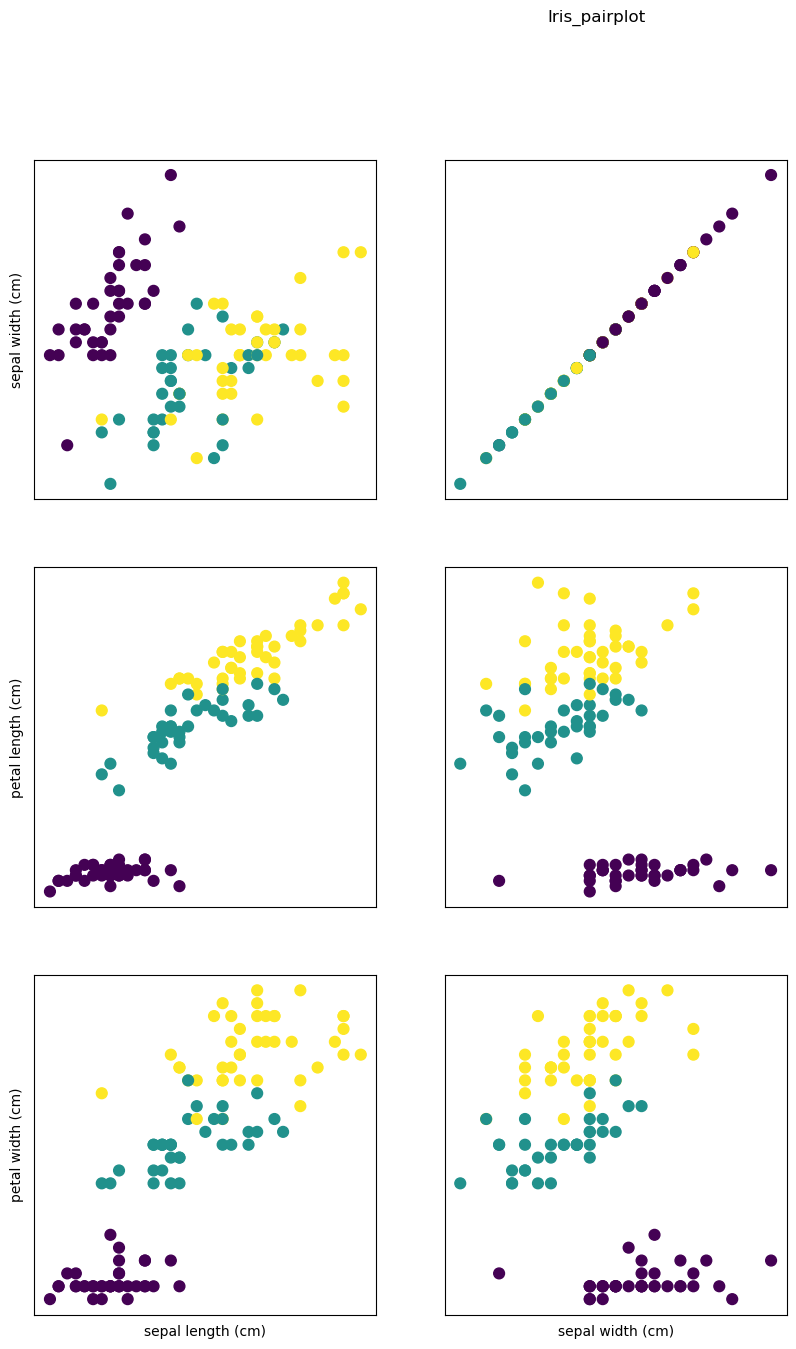

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("Iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > 1:
            ax[i, j].set_visible(False)

## Building my first model: K nearest neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [25]:
knn.fit(X_train, y_train)
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(n_neighbors=1)

### Making Predictions

In [26]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [27]:
prediction = knn. predict(X_new)
prediction

C:\Users\danie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [28]:
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

## Evaluating the Model

In [29]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736842105263158

In [30]:
#Alternatively
knn.score(X_test, y_test)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736842105263158

#### The accuracy of the test is 0.9736842105263158. It's 97.4% accurate


### The Forge Data Set

In [ ]:
# X, y = mgLearn.datasets.make_forge()
# plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
# print("X.shape: %s" % (X.shape,))